<a href="https://colab.research.google.com/github/tynimattias/EENG440_Labs/blob/main/440_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


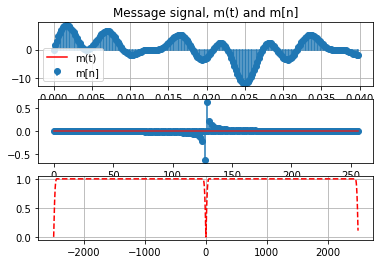

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab')
from CommunicationLib import DrawSpectrum
import scipy.signal as sci



f = [30, 70, 150, 190]
Ts = 0.0002
Fs = 1/Ts

n = np.arange(0,200,1)
t = Ts * n

message = np.zeros(200)
msgtemp = np.zeros(200)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  


Fig1 = plt.figure(1)
plt.subplot(311) 
plt.plot(t,message,'r-') 
plt.grid(True)
(markerline, stemlines, baseline) = plt.stem(t,message) 
plt.setp(baseline, visible=False)
plt.title('Message signal, m(t) and m[n]'); plt.xlabel('t [sec]')
plt.legend(('m(t)','m[n]'))
plt.rcParams['figure.figsize'] = [30, 20]



N = 257
Fdr = np.array([0.01,0.99])/2
Adr = np.array([1])
B = -sci.remez(N,Fdr,Adr,type='hilbert')

N = np.arange(0,N,1)


plt.subplot(312)
plt.stem(N,B)

plt.subplot(313)
DrawSpectrum(B, Fs,'r--')



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


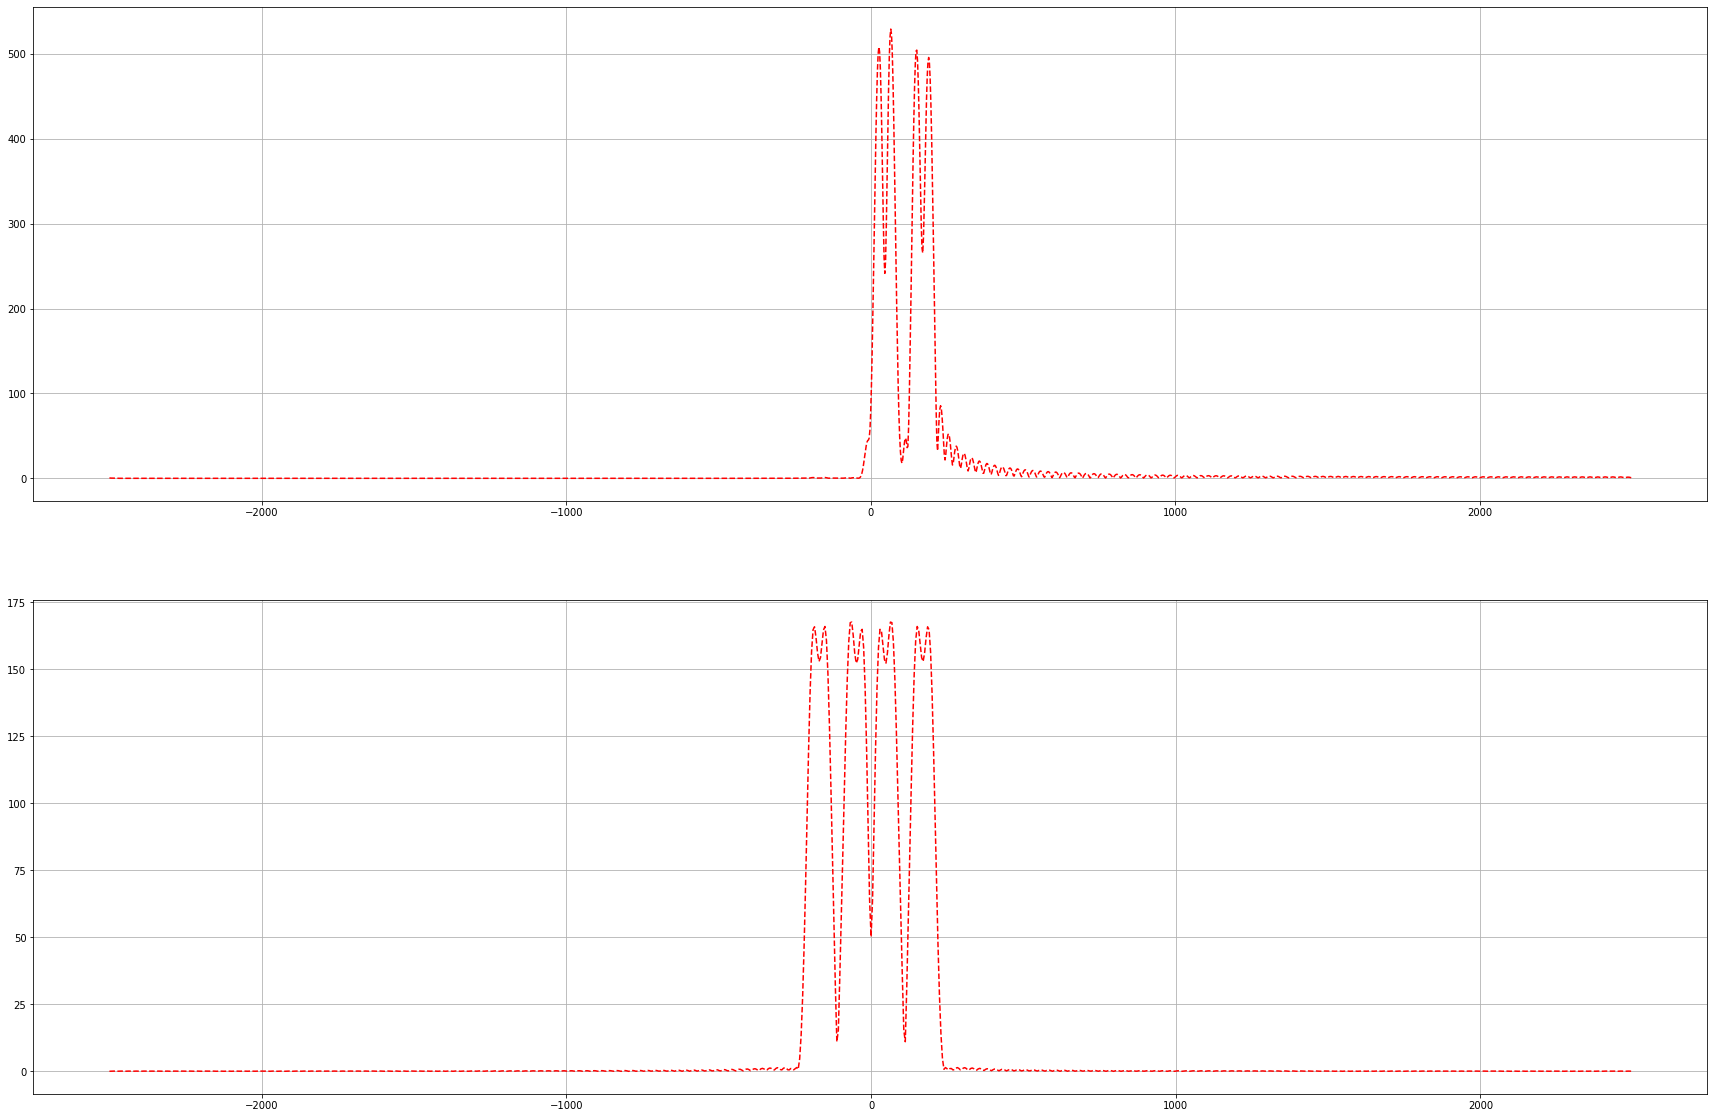

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab')
from CommunicationLib import DrawSpectrum
import scipy.signal as sci



f = [30, 70, 150, 190]
Ts = 0.0002
Fs = 1/Ts

n = np.arange(0,200,1)
t = Ts * n

message = np.zeros(200)
msgtemp = np.zeros(200)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  




N = 257
Fdr = np.array([0.01,0.99])/2
Adr = np.array([1])
B = -sci.remez(N,Fdr,Adr,type='hilbert')



Nd = np.arange(0,N,1)



j= np.complex(0,1)

Bd = np.zeros(N) 
Bd[int(np.floor(N/2))]=1
mtDelayed = sci.convolve(Bd,message)

B = sci.convolve(B, message)
zt = mtDelayed + B*j


plt.subplot(211)
DrawSpectrum(zt, Fs,'r--')


plt.subplot(212)
DrawSpectrum(message, Fs,'r--')



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


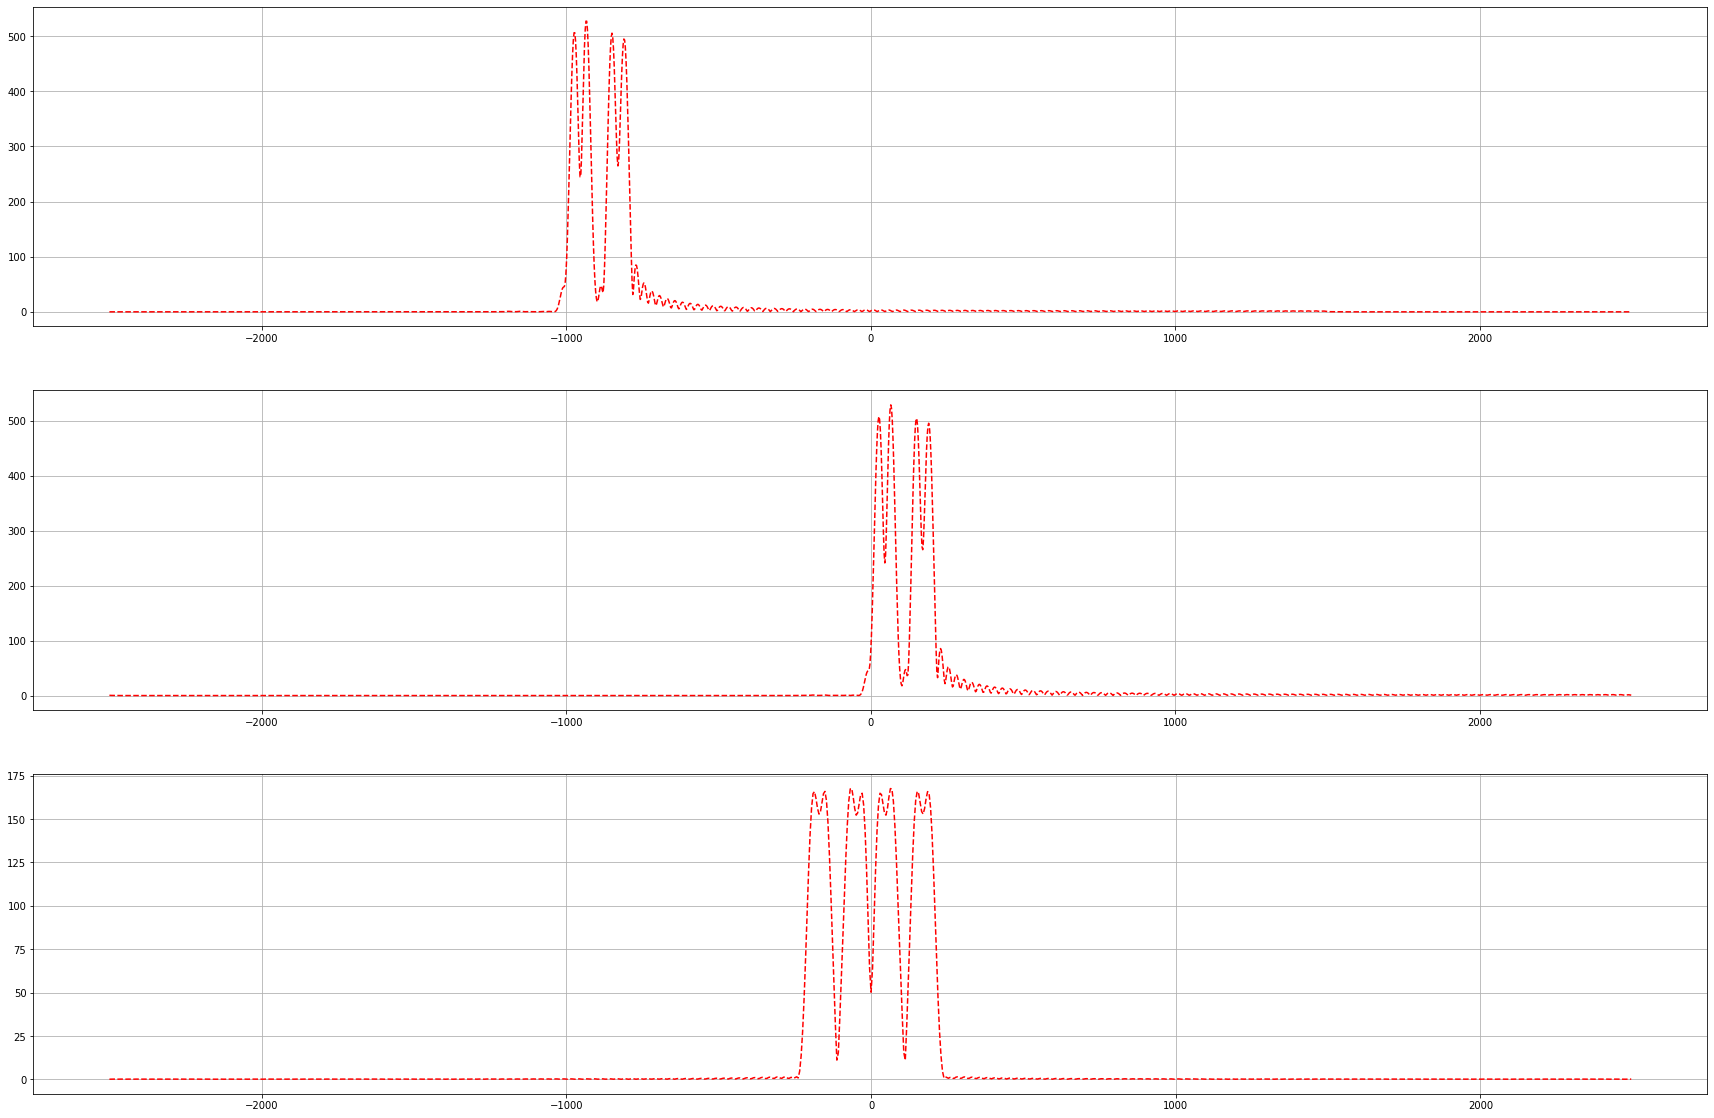

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab')
from CommunicationLib import DrawSpectrum
import scipy.signal as sci



f = [30, 70, 150, 190]
Ts = 0.0002
Fs = 1/Ts

n = np.arange(0,200,1)
t = Ts * n

message = np.zeros(200)
msgtemp = np.zeros(200)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  




N = 257
Fdr = np.array([0.01,0.99])/2
Adr = np.array([1])
B = -sci.remez(N,Fdr,Adr,type='hilbert')



Nd = np.arange(0,N,1)



j= np.complex(0,1)

Bd = np.zeros(N) 
Bd[int(np.floor(N/2))]=1
mtDelayed = sci.convolve(Bd,message)

B = sci.convolve(B, message)
zt = mtDelayed + B*j

newt = np.arange(0,456,1) * Ts

exp = np.exp(-j*2*np.pi*(1000)*newt)


xlt = zt * exp

plt.subplot(311)
DrawSpectrum(xlt, Fs,'r--')
plt.subplot(312)
DrawSpectrum(zt, Fs,'r--')


plt.subplot(313)
DrawSpectrum(message, Fs,'r--')


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab')
from CommunicationLib import DrawSpectrum
import scipy.signal as sci



f = [30, 70, 150, 190]
Ts = 0.0002
Fs = 1/Ts

n = np.arange(0,200,1)
t = Ts * n

message = np.zeros(200)
msgtemp = np.zeros(200)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  




N = 257
Fdr = np.array([0.01,0.99])/2
Adr = np.array([1])
B = -sci.remez(N,Fdr,Adr,type='hilbert')



Nd = np.arange(0,N,1)*Ts



j= np.complex(0,1)

Bd = np.zeros(N) 
Bd[int(np.floor(N/2))]=1
mtDelayed = sci.convolve(Bd,message)



mhat = sci.convolve(B, message)
zt = mtDelayed + B*j

newt = np.arange(0,456,1)*Ts

exp = np.exp(-j*2*np.pi*(1000)*newt)


xlt = zt * exp


mt = np.real(xlt*np.exp(j*2*np.pi*(1000)*newt))
mt = mt[int(np.floor(N/2)):int(np.floor(N/2))+len(message)]
mt_hat = np.imag(xlt*np.exp(j*2*np.pi*(1000)*newt))
mt_hat = mt_hat[int(np.floor(N/2)):int(np.floor(N/2))+len(message)]

plt.subplot(4,1,1)
plt.plot(t,mt,'b-o')
plt.plot(t,message,'r-*')

plt.subplot(4,1,2)
DrawSpectrum(mt, Fs, 'r--')
DrawSpectrum(message, Fs, 'b--')

plt.subplot(4,1,3)
plt.plot(t, message)
plt.plot(t, mt_hat)

plt.subplot(4,1,4)
DrawSpectrum(message, Fs, 'r')
DrawSpectrum(mhat, Fs, 'b--')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


ValueError: ignored